<a href="https://colab.research.google.com/github/Vincenzo-Miracula/MasterSDS/blob/main/Sentimet_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Sentiment Analysis & Emotion Detection](https://huggingface.co/models)
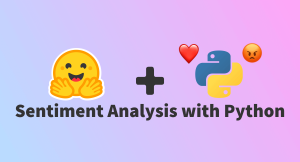
---
* L'analisi del sentimento è una tecnica di elaborazione del linguaggio naturale che valuta e determina l'emozione o il tono di un testo, solitamente classificandolo come positivo, negativo o neutro.
* Questo processo aiuta a comprendere l'opinione, l'umore o l'atteggiamento degli autori nei confronti di un argomento specifico ed è ampiamente utilizzato in applicazioni quali l'analisi dei feedback dei clienti, il monitoraggio dei social media e la valutazione delle recensioni dei prodotti.
* L'analisi del sentimento si basa su algoritmi di apprendimento automatico e sull'elaborazione linguistica per eseguire queste valutazioni in modo automatico.
---

In [ ]:
pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.8 MB/s eta 0:00:00 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch

zsh:1: command not found: transformers
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 5.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16

In [ ]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Utilizzo del dispositivo:", "GPU" if torch.cuda.is_available() else "CPU")

Utilizzo del dispositivo: CPU


# emotion

In [ ]:
from transformers import pipeline

emotion_en = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", device=device)
emotion_it = pipeline("text-classification", model="MilaNLProc/feel-it-italian-emotion", device=device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
Device set to use cpu


In [ ]:
emotion_it('Dai dai dai con questo film')

[{'label': 'joy', 'score': 0.9993932247161865}]

In [ ]:
def emotion_analysis(text, language='en'):
    if language == 'it':
        result = emotion_it(text)
    else:
        result = emotion_en(text)
    return result[0]['label']

emotion_analysis('what a good day')

'joy'

# sentiment

In [ ]:
from transformers import pipeline

sentiment = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis",  device=device)

Device set to use cpu


In [ ]:
sentiment('what a beautiful day')[0]['label']

'Very Positive'

In [ ]:
def sentiment_analysis(text):
    result = sentiment(text)
    return result[0]['label']

# pulizia testo

In [ ]:
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download it_core_news_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.6 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [ ]:
import spacy
import re

In [ ]:
nlp_en = spacy.load("en_core_web_sm")
nlp_it = spacy.load("it_core_news_sm")

In [ ]:
def clean_text(text, include_stopwords=False, language='en'):

    # Removal of HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Removal of emojis using a specific pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols and pictograms
                               u"\U0001F680-\U0001F6FF"  # Transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (regional indicators)
                               u"\U00002500-\U00002BEF"  # Miscellaneous symbols
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # Variants
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Removal of "RT" as an isolated word
    text = re.sub(r'\bRT\b', '', text)  # "\b" ensures that RT is treated as a separate word
    # Removal of links and user mentions
    text = re.sub(r'(https?://\S+|www\.\S+|@\w+\s*)', '', text)
    # Removal of hashtags
    text = re.sub(r'#[^\s]+', '', text)
    # Removal of newline characters and sequences of ">"
    text = text.replace("\n", '').replace(">", '')
    # Removal of special characters while retaining question marks
    text = re.sub(r'[^A-Za-zÀ-ÿ\s\'?]+', ' ', text)
    # Removal of multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    # Text analysis with spaCy for lemmatization
    #doc = nlp_en(text)
    if language == 'en':
        doc = nlp_en(text)
    else:
        doc = nlp_it(text)

    if include_stopwords:
        # Include stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_punct)
    else:
        # Exclude stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

    return cleaned_text

# df

In [ ]:
df = pd.read_csv('posts_bluesky.csv')

# analisi

In [ ]:
df['clean_text'] = df['text'].progress_apply(clean_text, language='it')

100%|██████████| 1481/1481 [00:04<00:00, 340.36it/s]


In [ ]:
df['sentiment'] = df['clean_text'].progress_apply(sentiment_analysis)

100%|██████████| 1481/1481 [00:42<00:00, 34.86it/s]


In [ ]:
df['emotion'] = df['clean_text'].progress_apply(emotion_analysis, language='it')

100%|██████████| 1481/1481 [01:27<00:00, 16.94it/s]


In [ ]:
df

,did,handle,display_name,avatar,text,created_at,uri,like_count,quote_count,reply_count,repost_count,clean_text,sentiment,emotion
0,did:plc:vmreizcjreooxecmzwzmcqeb,lucianaborsatti.bsky.social,NaN,https://cdn.bsky.app/img/avatar/plain/did:plc:...,My latest per @valigiablu.it. Fra i temi: dopo...,2025-01-13T21:32:46.533Z,at://did:plc:vmreizcjreooxecmzwzmcqeb/app.bsky...,4,0,0,3,my latest it il tema arresto cecilia sala torn...,Very Negative,anger
1,did:plc:uqzthzeh2yql5wtsyeyy5rwe,marcotombesi.bsky.social,NaN,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Scrittori a teatro: Cecilia Sala e Paolo Giord...,2025-01-13T18:34:40.611Z,at://did:plc:uqzthzeh2yql5wtsyeyy5rwe/app.bsky...,0,0,0,0,scrittore teatro cecilia sala Paolo giordare i...,Very Negative,joy
2,did:plc:p74hbfmudpwax7rcrly6wsi7,ricrdp.bsky.social,Riccardo De Palo,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Dal Murakami di Cecilia Sala a Patterson nelle...,2025-01-13T18:28:41.314Z,at://did:plc:p74hbfmudpwax7rcrly6wsi7/app.bsky...,0,0,0,0,murakame cecilia salo patterson prigione usare...,Very Negative,sadness
3,did:plc:j5rn7ncvevou5xldtttcze5n,mpaseri.bsky.social,MPaseri,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"Pakhshan Azizi e le altre detenute, ma anche i...",2025-01-13T18:05:21.995Z,at://did:plc:j5rn7ncvevou5xldtttcze5n/app.bsky...,0,0,0,0,pakhshan azize altro detenuto il nuovo negozia...,Very Negative,anger
4,did:plc:3pdxo3r45qz7ebgxkgnczf52,anisepis.bsky.social,Anis,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Abedini è libero. Ci si continua a interrogare...,2025-01-13T14:04:44.842Z,at://did:plc:3pdxo3r45qz7ebgxkgnczf52/app.bsky...,4,0,0,2,abedine libero continuare interrogare altro co...,Very Negative,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,did:plc:edlhbnew2fu4x3huxgrtybsp,ilpost.it,il Post,https://cdn.bsky.app/img/avatar/plain/did:plc:...,La giornalista Cecilia Sala è incarcerata in I...,2024-12-27T11:38:50.280Z,at://did:plc:edlhbnew2fu4x3huxgrtybsp/app.bsky...,502,58,24,257,giornalista cecilia salo incarcerare Iran regi...,Very Negative,anger
1477,did:plc:q6nch7a3lq4liwg4rhc2zlvm,scaste.bsky.social,Salvatore,https://cdn.bsky.app/img/avatar/plain/did:plc:...,La notizia dell’arresto in Iran di Cecilia Sal...,2024-12-27T11:37:01.089Z,at://did:plc:q6nch7a3lq4liwg4rhc2zlvm/app.bsky...,4,0,0,1,notizia arresto Iran cecilia salo preoccupante...,Very Negative,anger
1478,did:plc:leqrki5vfrwd73p4hekuipro,emenietti.bsky.social,emanuele menietti,https://cdn.bsky.app/img/avatar/plain/did:plc:...,La giornalista Cecilia Sala è incarcerata in I...,2024-12-27T11:35:43.016Z,at://did:plc:leqrki5vfrwd73p4hekuipro/app.bsky...,72,2,0,16,giornalista cecilia salo incarcerare Iran,Very Negative,anger
1479,did:plc:4unmpd4up7cvkqnfr67rlreo,jacopoiacoboni.bsky.social,Jacopo Iacoboni,https://cdn.bsky.app/img/avatar/plain/did:plc:...,La Farnesina ha appena reso noto ufficialmente...,2024-12-27T11:33:01.358Z,at://did:plc:4unmpd4up7cvkqnfr67rlreo/app.bsky...,241,5,10,37,Farnesina appena rendere noto ufficialmente ce...,Very Negative,anger


In [ ]:
df.to_csv('posts_bluesky_sentiment_emotion.csv', index=False)
#df.to_excel()

<Axes: title={'center': 'BlueSky emotion analysis of posts'}, xlabel='emotion'>

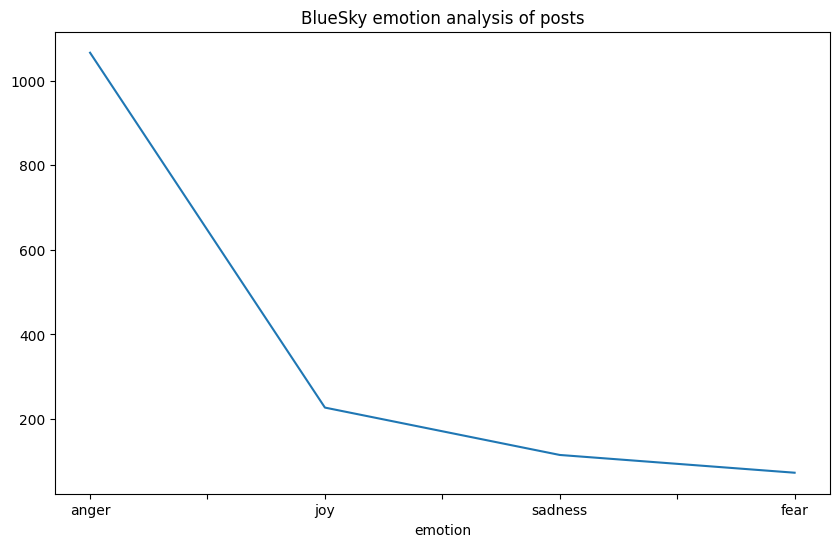

In [ ]:
import matplotlib.pyplot as plt

# plot emotion
plt.figure(figsize=(10, 6))
df['emotion'].value_counts().plot(title='BlueSky emotion analysis of posts', kind='line')


<Axes: title={'center': 'BlueSky sentiment analysis of posts'}, xlabel='sentiment'>

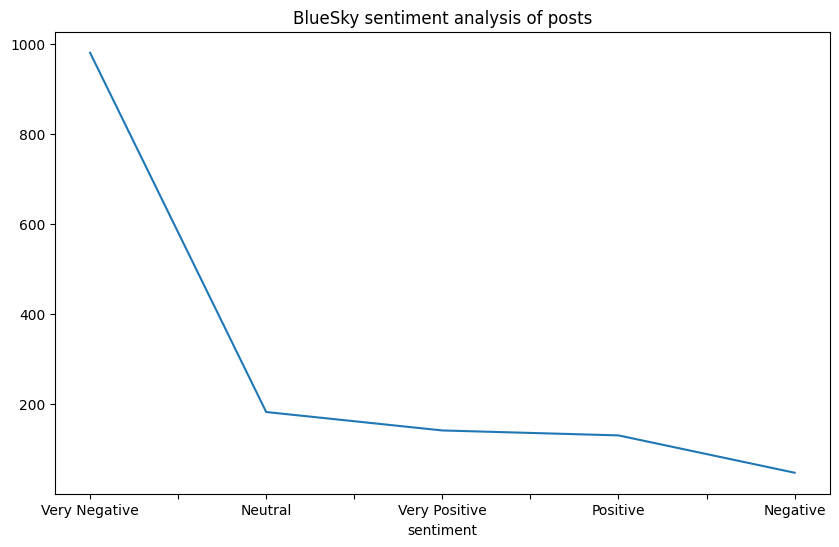

In [ ]:
# plot sentiment
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(title='BlueSky sentiment analysis of posts', kind='line')

Top 20 most frequent words:
             count  relative_frequency
Iran           284            0.019192
giornalista    217            0.014664
Italia         188            0.012704
libero         158            0.010677
iraniano       142            0.009596
liberazione    132            0.008920
arresto        129            0.008717
liberare       128            0.008650
arrestare      120            0.008109
italiano       118            0.007974
teheran        112            0.007569
tornare         87            0.005879
chiedere        87            0.005879
carcere         86            0.005812
notizia         84            0.005676
regime          58            0.003919
abedine         57            0.003852
tajano          56            0.003784
trump           54            0.003649
detenere        54            0.003649


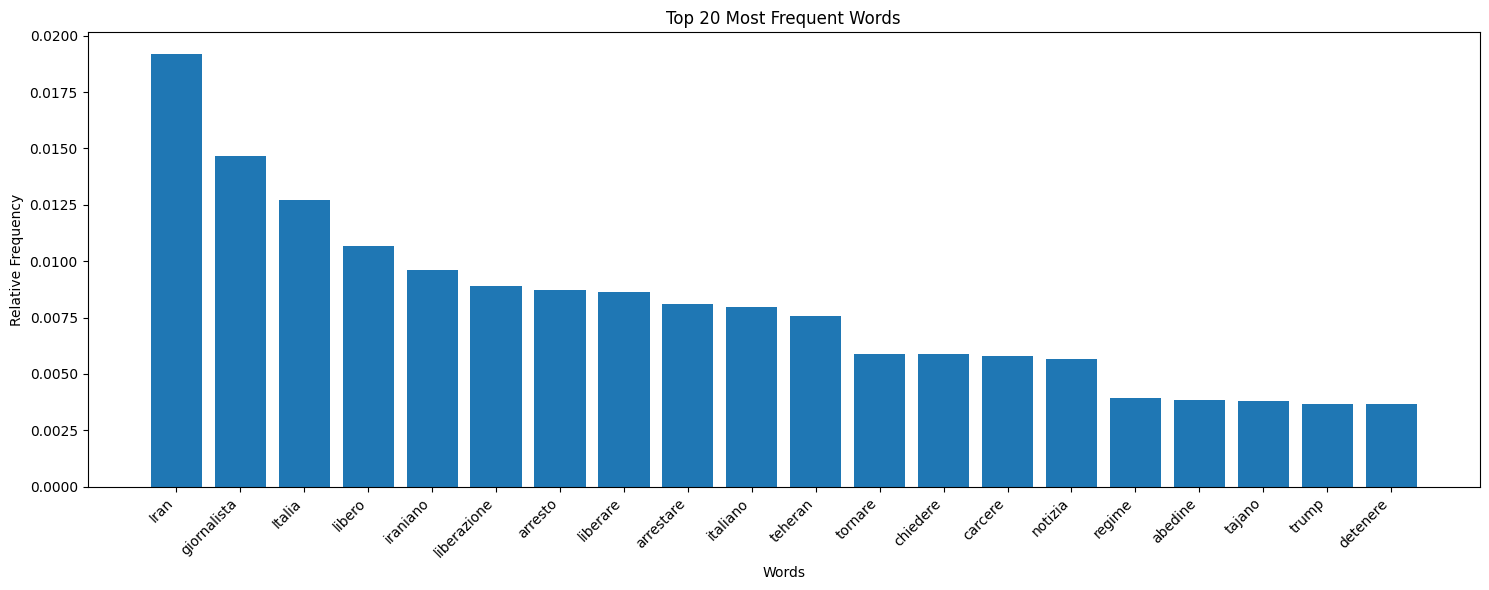

In [ ]:
from collections import Counter

def get_word_frequencies(df, text_column='clean_text'):
    # Combine all texts into one list of words
    all_words = []
    for text in df[text_column]:
        # Split each text into words
        words = str(text).split()
        all_words.extend(words)

    # Remove "cecilia, salo, sala, salare, il, l" in upper and lower case from the list of words
    all_words = [word for word in all_words if word.lower() not in [
        'cecilia', 'salo', 'sala', 'salare', 'il', 'l',
        'lo', 'la', 'le', 'o', 'melone'
    ]]

    # Calculate total words
    total_words = len(all_words)

    # Get word counts
    word_counts = Counter(all_words)

    # Create DataFrame with frequencies
    freq_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
    freq_df['relative_frequency'] = freq_df['count'] / total_words

    # Sort by frequency in descending order
    freq_df = freq_df.sort_values('count', ascending=False)

    return freq_df

# Calculate frequencies
word_frequencies = get_word_frequencies(df)

# Show top 20 words
print("Top 20 most frequent words:")
print(word_frequencies.head(20))

# Optional: Visualize the top N words
import matplotlib.pyplot as plt

def plot_top_words(freq_df, n=20):
    plt.figure(figsize=(15, 6))
    plt.bar(freq_df.head(n).index, freq_df.head(n)['relative_frequency'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Relative Frequency')
    plt.tight_layout()
    plt.show()

plot_top_words(word_frequencies)


Top 10 words for anger:
Iran: 0.0231
giornalista: 0.0157
Italia: 0.0116
iraniano: 0.0116
arresto: 0.0102
arrestare: 0.0102
liberazione: 0.0094
liberare: 0.0093
teheran: 0.0081
italiano: 0.0079

Top 10 words for joy:
libero: 0.0226
notizia: 0.0166
abbraccio: 0.0151
tornare: 0.0136
Italia: 0.0136
bello: 0.0116
compagno: 0.0116
giornalista: 0.0101
Roma: 0.0096
social: 0.0096

Top 10 words for sadness:
Italia: 0.0226
libero: 0.0194
tornare: 0.0183
giornalista: 0.0108
rientrare: 0.0097
liberazione: 0.0086
com: 0.0086
notizia: 0.0086
cella: 0.0075
liberare: 0.0075

Top 10 words for fear:
libero: 0.0218
giornalista: 0.0171
Italia: 0.0156
cella: 0.0140
arresto: 0.0124
italiano: 0.0124
Iran: 0.0124
teheran: 0.0109
condizione: 0.0093
notizia: 0.0093


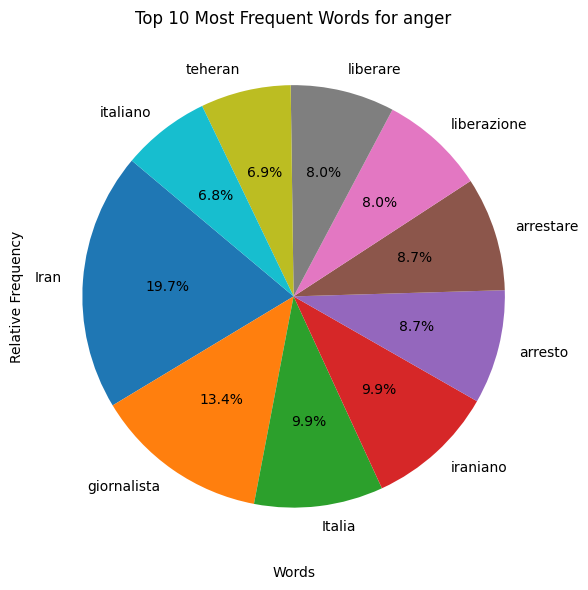

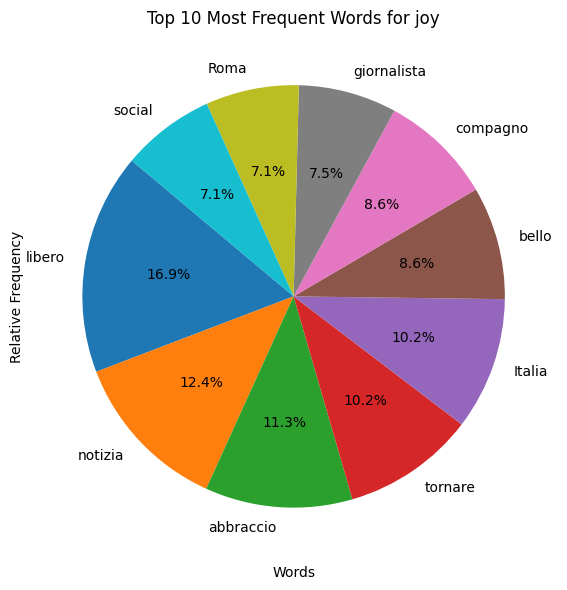

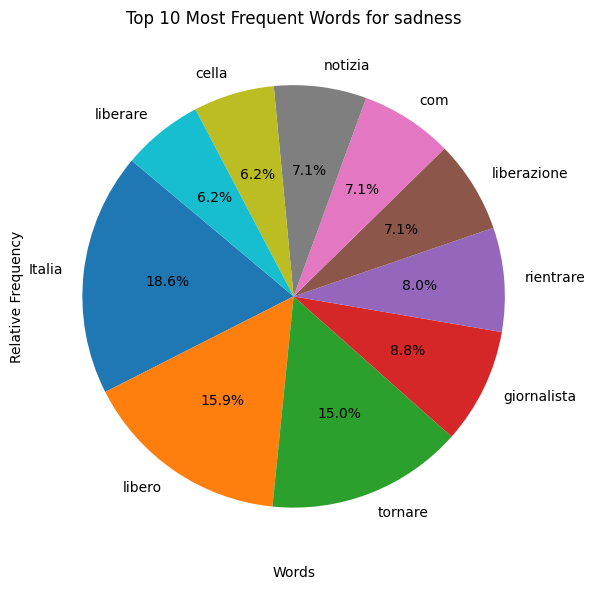

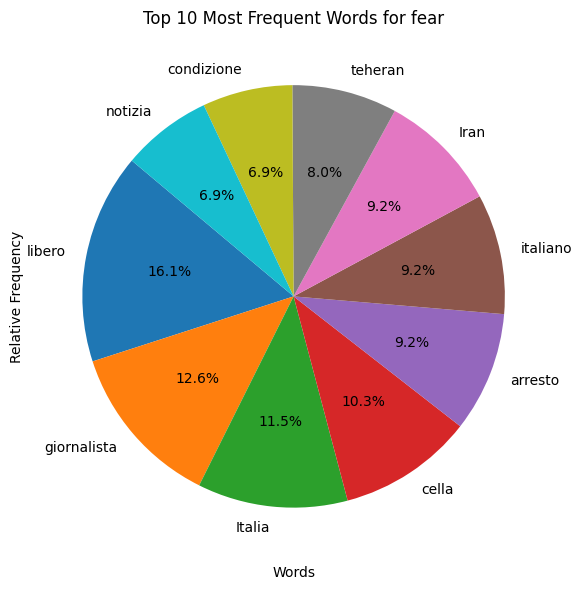

In [ ]:
def get_word_frequencies_by_group(df, text_column='clean_text', group_column='emotion'):
    frequencies = {}

    for group in df[group_column].unique():
        group_texts = df[df[group_column] == group][text_column]

        # Get words for this group
        group_words = []
        for text in group_texts:
            words = str(text).split()
            group_words.extend(words)

        # Remove "cecilia, salo, sala, salare, il, l" in upper and lower case from the list of words
        group_words = [word for word in group_words if word.lower() not in [
            'cecilia', 'salo', 'sala', 'salare', 'il', 'l',
            'lo', 'la', 'le', 'o', 'melone'
        ]]
        total_words = len(group_words)
        word_counts = Counter(group_words)

        # Calculate relative frequencies
        frequencies[group] = {word: count/total_words
                            for word, count in word_counts.items()}

    return frequencies

# Calculate frequencies by group
group_frequencies = get_word_frequencies_by_group(df)

# Show top words for each group
for group, freqs in group_frequencies.items():
    print(f"\nTop 10 words for {group}:")
    sorted_words = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]
    for word, freq in sorted_words:
        print(f"{word}: {freq:.4f}")

# Optional: Visualize the top N words
def plot_top_words_by_group(group_freqs, n=10):
    for group, freqs in group_freqs.items():
        sorted_words = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*sorted_words)

        plt.figure(figsize=(15, 6))
        plt.pie(freqs, labels=words, autopct='%1.1f%%', startangle=140)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {n} Most Frequent Words for {group}')
        plt.xlabel('Words')
        plt.ylabel('Relative Frequency')
        plt.tight_layout()
        plt.show()

plot_top_words_by_group(group_frequencies)